<a href="https://colab.research.google.com/github/danykoud/Test-/blob/main/dataMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

import pprint

In [ ]:
twenty_train = fetch_20newsgroups(subset='train',
    shuffle=True, random_state=42)
twenty_train.target_names
 

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [ ]:
classes= ['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [ ]:
 
#  len(twenty_train.data)

len(twenty_train.filenames)

11314

In [ ]:
# print the first lines of the first loaded file

print("\n".join(twenty_train.data[0].split("\n")[:3]))
print('categories:  ' + twenty_train.target_names[twenty_train.target[0]])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
categories:  rec.autos


Supervised learning algorithms will require a category label for each document in the training set. In this case the category is the name of the newsgroup which also happens to be the name of the folder holding the individual documents.

For speed and space efficiency reasons scikit-learn loads the target attribute as an array of integers that corresponds to the index of the category name in the target_names list. The category integer id of each sample is stored in the target attribute:

In [ ]:

twenty_train.target[:10]
for t in twenty_train.target[:10]:
  print(twenty_train.target_names[t])

rec.autos
comp.sys.mac.hardware
comp.sys.mac.hardware
comp.graphics
sci.space
talk.politics.guns
sci.med
comp.sys.ibm.pc.hardware
comp.os.ms-windows.misc
comp.sys.mac.hardware


fetch_20newsgroups(..., shuffle=True, random_state=42): this is useful if you wish to select only a subset of samples to quickly train a model and get a first idea of the results before re-training on the complete dataset later.



In order to perform machine learning on text documents, we first need to turn the text content into numerical feature vectors

In [ ]:
# Text preprocessing, tokenizing, stemming, and filtering of stopwords 
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(twenty_train.data)
X_train_counts.shape

(11314, 130107)

In [ ]:

# tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
# X_train_tf = tf_transformer.transform(X_train_counts)
# X_train_tf.shape

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(11314, 130107)

# **NAIVE BAYES**

In [ ]:
# initializing and fitting our model 
clf = MultinomialNB().fit(X_train_tfidf, twenty_train.target)
# predict the outcome on a new document by extracting the features using almost the same feature extracting chain as before. The difference is
#  that we call transform instead of fit_transform on the transformers, since they have already been fit to the training set

docs_new = ['God is love', 'OpenGL on the GPU is fast']
X_new_counts = count_vect.transform(docs_new)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

predicted = clf.predict(X_new_tfidf)

for doc, category in zip(docs_new, predicted):
  print('%r => %s' % (doc, twenty_train.target_names[category]))

'God is love' => soc.religion.christian
'OpenGL on the GPU is fast' => rec.autos


# **Using a pipeline** 

In [ ]:

text_clf = Pipeline([
     ('vect', CountVectorizer()),
     ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),])

In [ ]:
text_clf.fit(twenty_train.data, twenty_train.target)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:

twenty_test = fetch_20newsgroups(subset='test',
     shuffle=True, random_state=42)
docs_test = twenty_test.data
predicted = text_clf.predict(docs_test) 
np.mean(predicted == twenty_test.target)

0.7738980350504514

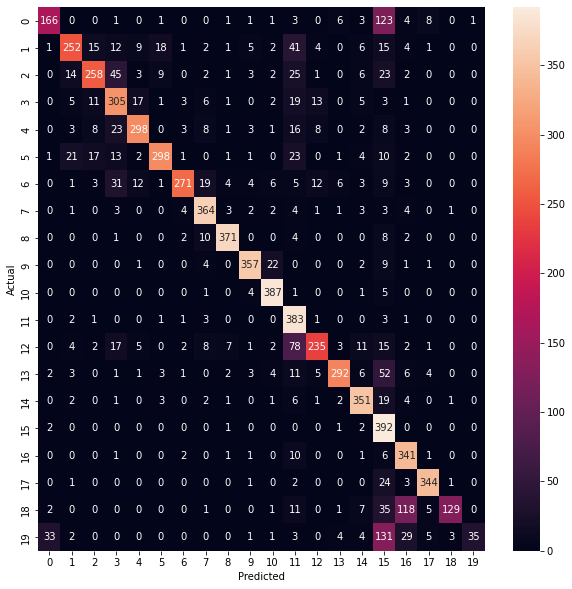

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(twenty_test.target, predicted)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
# using pprint to display the predicton of the first 10 data
data= { twenty_train.target_names[category] : doc          for doc, category in zip(docs_test[:10], predicted)}
pprint.pprint(data, depth=1)

{'alt.atheism': 'From: livesey@solntze.wpd.sgi.com (Jon Livesey)\n'
                'Subject: Re: After 2000 years, can we say that Christian '
                'Morality is\n'
                'Organization: sgi\n'
                'Lines: 22\n'
                'Distribution: world\n'
                'NNTP-Posting-Host: solntze.wpd.sgi.com\n'
                '\n'
                'In article <1993Apr21.141259.12012@st-andrews.ac.uk>, '
                'nrp@st-andrews.ac.uk (Norman R. Paterson) writes:\n'
                '|> In article <1r2m21$8mo@fido.asd.sgi.com> '
                'livesey@solntze.wpd.sgi.com (Jon Livesey) writes:\n'
                '|> >In article <1993Apr19.151902.21216@st-andrews.ac.uk>, '
                'nrp@st-andrews.ac.uk (Norman R. Paterson) writes:\n'
                "> >Just as well, then, that I'm not claiming that my own "
                'moral system is\n'
                '> >absolute.\n'
                '> >\n'
                '> >jon.\n'
                

In [ ]:
# using panda to display the predicton of the first 10 data in the dataframe format 
data= { twenty_train.target_names[category] : doc          for doc, category in zip(docs_test[:10], predicted)}

pred= pd.DataFrame(data, index=[i for i in range(len(data))])
pred

rec.autos  ...                                      comp.graphics
0  From: v064mb9k@ubvmsd.cc.buffalo.edu (NEIL B. ...  ...  From: tmc@spartan.ac.BrockU.CA (Tim Ciceran)\n...
1  From: v064mb9k@ubvmsd.cc.buffalo.edu (NEIL B. ...  ...  From: tmc@spartan.ac.BrockU.CA (Tim Ciceran)\n...
2  From: v064mb9k@ubvmsd.cc.buffalo.edu (NEIL B. ...  ...  From: tmc@spartan.ac.BrockU.CA (Tim Ciceran)\n...
3  From: v064mb9k@ubvmsd.cc.buffalo.edu (NEIL B. ...  ...  From: tmc@spartan.ac.BrockU.CA (Tim Ciceran)\n...
4  From: v064mb9k@ubvmsd.cc.buffalo.edu (NEIL B. ...  ...  From: tmc@spartan.ac.BrockU.CA (Tim Ciceran)\n...
5  From: v064mb9k@ubvmsd.cc.buffalo.edu (NEIL B. ...  ...  From: tmc@spartan.ac.BrockU.CA (Tim Ciceran)\n...
6  From: v064mb9k@ubvmsd.cc.buffalo.edu (NEIL B. ...  ...  From: tmc@spartan.ac.BrockU.CA (Tim Ciceran)\n...
7  From: v064mb9k@ubvmsd.cc.buffalo.edu (NEIL B. ...  ...  From: tmc@spartan.ac.BrockU.CA (Tim Ciceran)\n...

[8 rows x 8 columns]

# ***support vector machine (SVM)***

In [ ]:
text_clf = Pipeline([
    ('vect', CountVectorizer()),
     ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(loss='hinge', penalty='l2',
                          alpha=1e-3, random_state=42,
                         max_iter=5, tol=None)), ])

In [ ]:
text_clf.fit(twenty_train.data, twenty_train.target)
predicted = text_clf.predict(docs_test)
np.mean(predicted == twenty_test.target)

0.8248805098247477

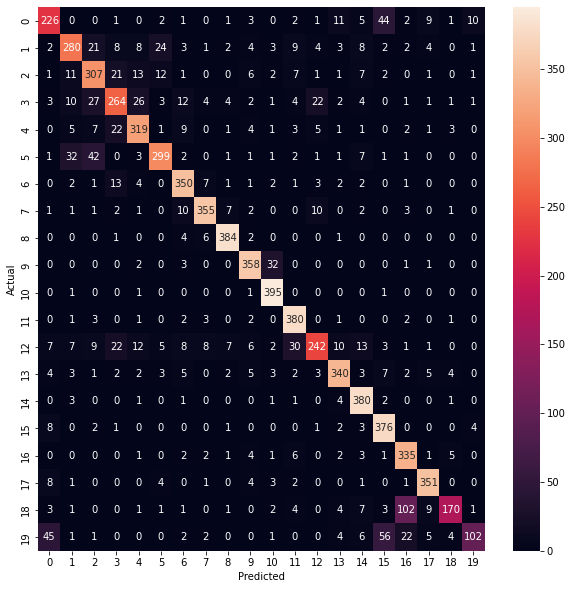

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(twenty_test.target, predicted)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ***KNN*** 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf,twenty_train.target, random_state=42)

k: 1, Train/Test Score: 1.000/1.000
k: 3, Train/Test Score: 0.912/0.907
k: 5, Train/Test Score: 0.880/0.876
k: 7, Train/Test Score: 0.860/0.855
k: 9, Train/Test Score: 0.847/0.843
k: 11, Train/Test Score: 0.835/0.835
k: 13, Train/Test Score: 0.822/0.823
k: 15, Train/Test Score: 0.817/0.814
k: 17, Train/Test Score: 0.810/0.803
k: 19, Train/Test Score: 0.803/0.798


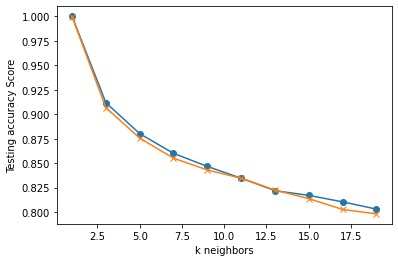

In [ ]:
# We can use Pipeline to add vectorizer -> transformer -> classifier all in a one compound classifier
train_scores = []
test_scores = []
for k in range(1, 20, 2):
  knn = KNeighborsClassifier(n_neighbors=k)
  text_clf = Pipeline([
  ('vect', CountVectorizer()),
  ('tfidf', TfidfTransformer()),
  ('clf', knn)])
# Fitting our train data to the pipeline
  text_clf.fit(twenty_train.data, twenty_train.target)
  train_score = knn.score(X_train,  y_train)
  test_score = knn.score( X_test, y_test)
  train_scores.append(train_score)
  test_scores.append(test_score)
  print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()


In [ ]:
 # Note that k: 1 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors= 1)
text_clf = Pipeline([
  ('vect', CountVectorizer()),
  ('tfidf', TfidfTransformer()),
('clf', knn)])
# Fitting our train data to the pipeline
text_clf.fit(twenty_train.data, twenty_train.target)

# Test data 
test_data = fetch_20newsgroups(subset='test',
                                shuffle=True, random_state=42)
docs_test = test_data.data
# Predicting our test data
predicted = text_clf.predict(docs_test)
print('We got an accuracy of',np.mean(predicted == test_data.target)*100, '% over the test data.')

We got an accuracy of 67.24641529474243 % over the test data.


# ***Decision Tree***

In [ ]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
# Create Decision Tree classifer object
dtc = DecisionTreeClassifier()
# pipeline 
text_dtc = Pipeline([
  ('vect', CountVectorizer()),
  ('tfidf', TfidfTransformer()),
('clf', dtc)])
cf=text_dtc.fit(twenty_train.data, twenty_train.target)
# Test data 
test_data = fetch_20newsgroups(subset='test',
                                shuffle=True, random_state=42)
docs_test = test_data.data
# two approach / accuracy rate  
# Predicting our test data
predicted = text_dtc.predict(docs_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_data.target, predicted))
# print('We got an accuracy of',np.mean(predicted == test_data.target)*100, '% over the test data.')



Accuracy: 0.5527084439723845


# ***Visualizing Decision Trees***

In [ ]:
from sklearn.externals.six import StringIO 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,  
    class_names=twenty_train.target_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue(), )  
graph.write_png('20newsgroups.png')
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.186131 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.186131 to fit

